<h1 style="text-align: center;">Pandas</h1>

Импортирум необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

В **pandas** определены два класса объектов:

- Series - одномерный массив, который может хранить значения любого типа данных.
- DataFrame — двумерный массив (таблица), в котором столбцами являются объекты класса Series

В данном примере будет рассматриваться [набор данных с Kaggle](https://www.kaggle.com/code/pashmeenkaur/penguin-dataset-knn), который помещён в папку [data](./data/), находящуюся в той же директории, что и файл jupyter-notebook

Данные хранятся в виде файлов с расширением **.csv**, мы можем открыть его и преобразовать данные в структуру **DataFrame**

In [2]:
df = pd.read_csv('data\penguins_size.csv')


Помимо формата **.csv** часто данные хранят в виде Excell-таблиц или в формате JSON. Для работы с ними есть команды **read_excel()** и **read_json()**

Для просмотра первых **n** строк таблицы используется метод **head(n)**, в которой по умолчанию установлено значение параметра $n=5$

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Для вывода последних **n** строк используется схожая по действию команда **tail(n)**

In [4]:
df.tail(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


**NaN** - стандартное обозначение, указывающее на отсутствие данных в таблице. Убрать отсутствующие данные можно с помощью метода **dropna()**.

Некоторые параметры **dropna()**:
- axis - определяет будут удаляться строки или столбцы
- how - определяет критерий, по которому удаляется строка/столбец (any - удалять, если есть хоть один NaN; all - удалять, если все значения равны NaN)
- inplace - определяет следует ли изменять текущий DataFrame или же создавать новый
- ignore_index - определяет какие индексы следует проигнорировать


In [5]:
print(len(df))
df.dropna(inplace=True)
print(len(df))


344
334


Для объектов **DataFrame** доступны срезы

In [6]:
df[3:10]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


Также можно вывести списки индексов строк и заголовков столбцов

In [7]:
print(df.index)
print(df.columns)


Int64Index([  0,   1,   2,   4,   5,   6,   7,  12,  13,  14,
            ...
            333, 334, 335, 336, 337, 338, 340, 341, 342, 343],
           dtype='int64', length=334)
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'gender'],
      dtype='object')


Для доступа к данным по индексу строки используется атрибут **loc**, для доступа по числовому значению индекса **iloc**

In [8]:
df.loc[0]

species                 Adelie
island               Torgersen
culmen_length_mm          39.1
culmen_depth_mm           18.7
flipper_length_mm        181.0
body_mass_g             3750.0
gender                    MALE
Name: 0, dtype: object

Вместо индексов можно использовать условие для фильтрации

In [9]:
df[df['species'] == 'Adelie']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


Отсортировать значения можно с помощью метода **sort_values()**

In [10]:
df.sort_values('body_mass_g')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,FEMALE
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE
...,...,...,...,...,...,...,...
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


Для добавления нового столбца существует метод **assign()**, который позволяет использовать **lambda**-функции

In [11]:
new_df = df.assign(
    relative_mass=lambda x: x['body_mass_g']/df['body_mass_g'].max())


In [12]:
new_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,relative_mass
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.595238
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.603175
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.515873
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.547619
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0.579365
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0.781746
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.769841
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.912698
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.825397


В практических задачах часто требуется сгруппировать записи по различным параметрам, для этой задачи подходит метод **groupby()**.

Выведем информацию о средней массе пингвинов разного пола, живущих на различных островах и относящимся к различным породам

In [13]:
df.groupby(['island', 'species', 'gender'])['body_mass_g'].mean()


island     species    gender
Biscoe     Adelie     FEMALE    3369.318182
                      MALE      4050.000000
           Gentoo     .         4875.000000
                      FEMALE    4679.741379
                      MALE      5484.836066
Dream      Adelie     FEMALE    3344.444444
                      MALE      4045.535714
           Chinstrap  FEMALE    3527.205882
                      MALE      3938.970588
Torgersen  Adelie     FEMALE    3395.833333
                      MALE      4034.782609
Name: body_mass_g, dtype: float64

В сгруппированных данных видно, что в данных есть артефакт в виде пола "**.**" у пингвинов Gentoo с острова Biscoe.

Отфильтруем данные по этому параметру

In [14]:
df[df['gender'] == '.']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Видим, что такой пингвин один, для оценки его пола посмотрим на его "ближайших соседей"

In [15]:
grouped = df.groupby(['island', 'species', 'gender'])


In [16]:
data_male = grouped.get_group(('Biscoe', 'Gentoo', 'MALE'))
data_female = grouped.get_group(('Biscoe', 'Gentoo', 'FEMALE'))
unknown_gender = df[df['gender'] == '.']


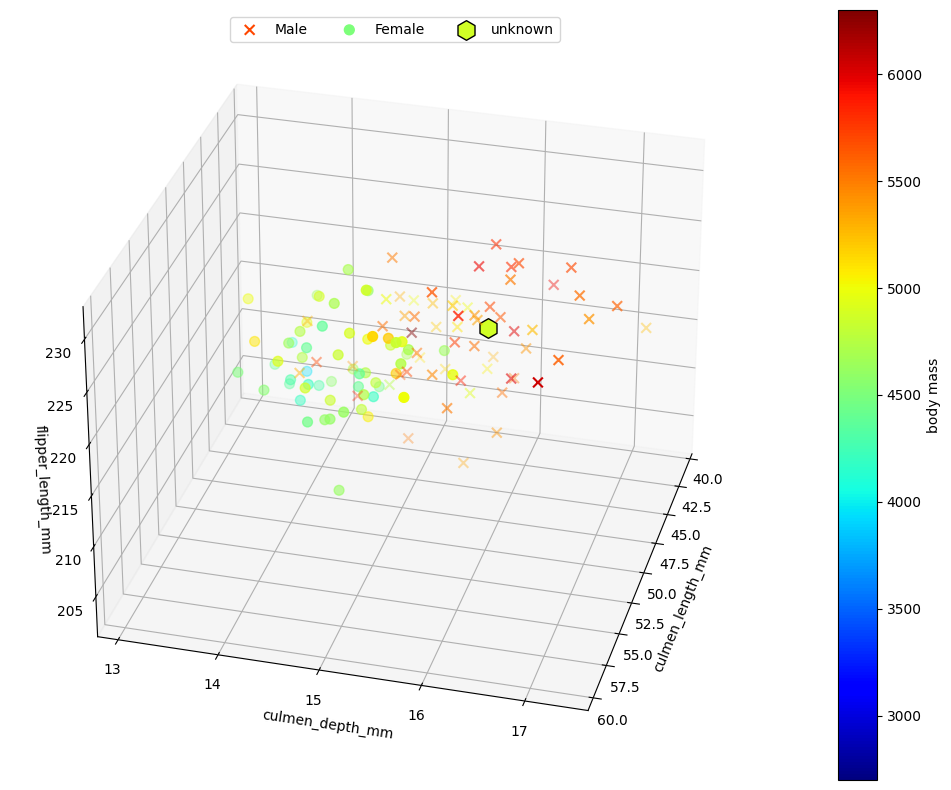

In [17]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

p_m = ax.scatter(data_male['culmen_length_mm'], data_male['culmen_depth_mm'], data_male['flipper_length_mm'],
                 marker='x', s=50, c=data_male['body_mass_g'], label='Male', cmap='jet', vmin=df['body_mass_g'].min(), vmax=df['body_mass_g'].max())
p_f = ax.scatter(data_female['culmen_length_mm'], data_female['culmen_depth_mm'], data_female['flipper_length_mm'],
                 marker='o', s=50, c=data_female['body_mass_g'], label='Female', cmap='jet', vmin=df['body_mass_g'].min(), vmax=df['body_mass_g'].max())
ax.scatter(unknown_gender['culmen_length_mm'], unknown_gender['culmen_depth_mm'], unknown_gender['flipper_length_mm'],
           marker='h', edgecolors='black', c=unknown_gender['body_mass_g'], label='unknown', s=200, cmap='jet', vmin=df['body_mass_g'].min(), vmax=df['body_mass_g'].max())

ax.set_xlabel('culmen_length_mm')
ax.set_ylabel('culmen_depth_mm')
ax.set_zlabel('flipper_length_mm')
ax.zaxis.labelpad = 0

ax.view_init(30, 15)

plt.legend(ncol=3, loc=9)

fig.colorbar(p_f, ax=ax, label='body mass')

plt.tight_layout()

plt.show()